In [1]:
pip install tensorflow


Note: you may need to restart the kernel to use updated packages.


In [2]:
import tensorflow

In [3]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten, BatchNormalization, Dropout
from tensorflow.keras.regularizers import l1, l2
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt
import numpy as np

Load the MNIST dataset

In [4]:
(train_data,train_target),(test_data,test_target) = mnist.load_data()

Visualize the dataset

Target labels:  [5 8 1 2 0 8 3 3 9 5]


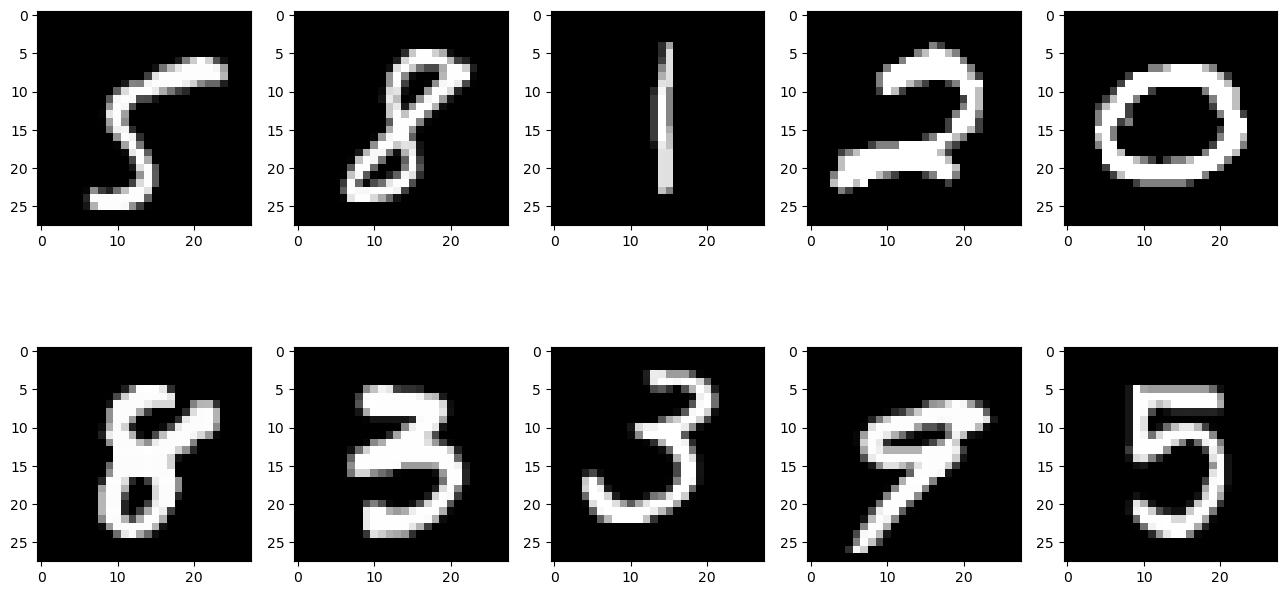

In [5]:
fig, axs = plt.subplots(2, 5, figsize=(16,8))
random_numbers = np.random.randint(0, 60000, 10)
print('Target labels: ',train_target[random_numbers])
for idx, ax in enumerate(axs.ravel()):
    ax.imshow(train_data[random_numbers[idx]],cmap='gray')
plt.show()

Pre-processing stage

In [6]:
new_train_data = train_data/255.0
new_test_data=test_data/255.0

new_train_target = to_categorical(train_target)
new_test_target = to_categorical(test_target)

Create the Model architecture

In [7]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras import regularizers

# Assuming you have 10 classes and grayscale images of shape (28, 28)
num_classes = 10

# Build the model
model = Sequential()

model.add(Flatten(input_shape=(28, 28)))  # Flatten the input images

model.add(Dense(32, activation='relu'))  # Adjust units as needed

# Add L1 and L2 regularization to this layer
model.add(Dense(32, activation='relu', kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001)))

model.add(Dense(num_classes, activation='softmax'))  # Output layer for classification

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 32)                25120     
                                                                 
 dense_1 (Dense)             (None, 32)                1056      
                                                                 
 dense_2 (Dense)             (None, 10)                330       
                                                                 
Total params: 26506 (103.54 KB)
Trainable params: 26506 (103.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Train the model

In [9]:
train_info = model.fit(new_train_data , new_train_target , epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4858 - accuracy: 0.8973
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2787 - accuracy: 0.9462
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2246 - accuracy: 0.9553
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1948 - accuracy: 0.9611
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1755 - accuracy: 0.9644
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1589 - accuracy: 0.9679
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1482 - accuracy: 0.9700
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1391 - accuracy: 0.9713
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1320 - accuracy: 0.9726
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.123

Plot the loss and accuracy graphs

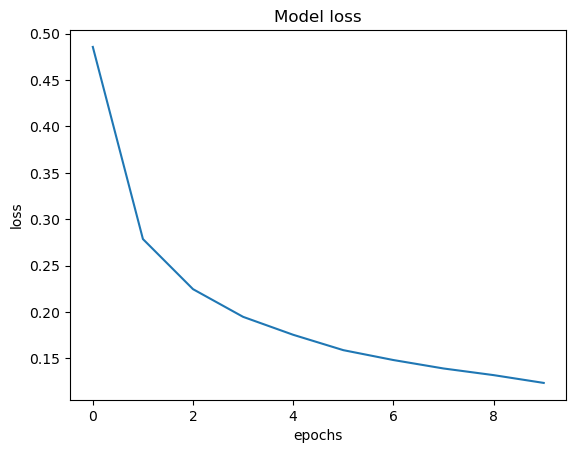

In [10]:
plt.plot(train_info.history['loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.title('Model loss')
plt.show()

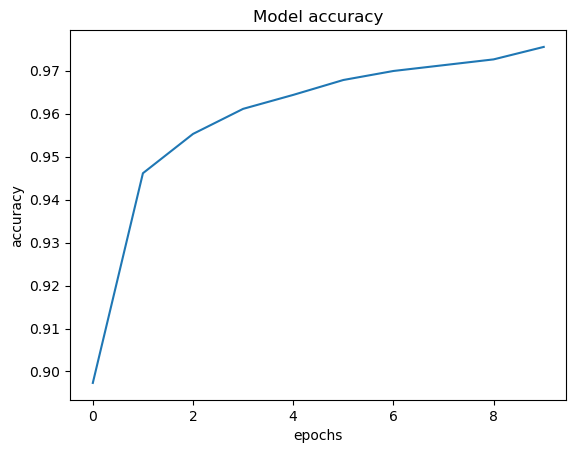

In [11]:
plt.plot(train_info.history['accuracy'])
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.title('Model accuracy')
plt.show()

Test the performance of Model

In [12]:
loss, acc = model.evaluate(new_test_data , new_test_target)
print(f'Loss of the Test dataset is: {loss}\nAccuracy of the test dataset is: {acc}')

313/313 [==============================] - 1s 1ms/step - loss: 0.1450 - accuracy: 0.9666
Loss of the Test dataset is: 0.14503894746303558
Accuracy of the test dataset is: 0.9666000008583069


Save the model weights

In [13]:
model.save_weights('MNIST_WEIGHTS_V1.h5')

313/313 [==============================] - 1s 2ms/step


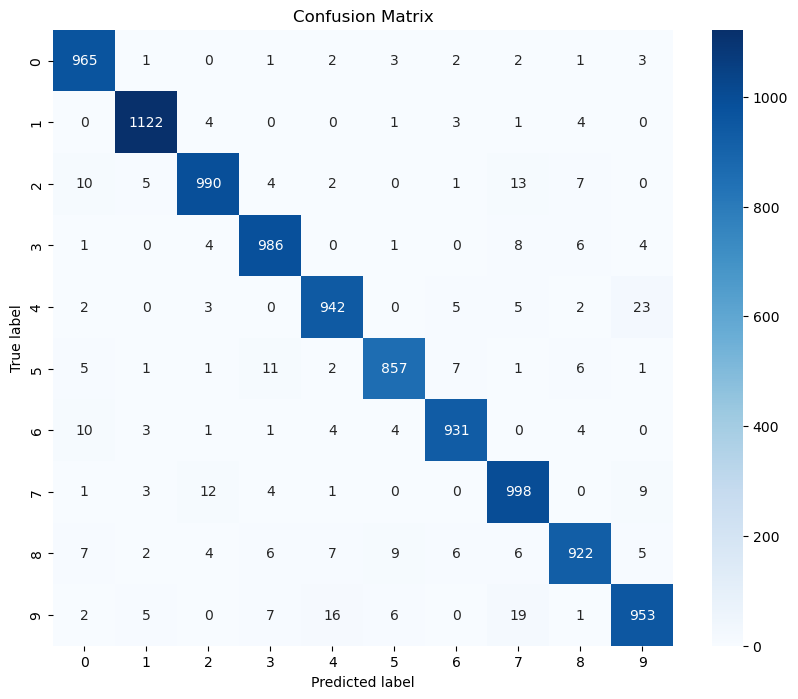

In [19]:
import numpy as np
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have a model 'model' and test data 'new_test_data'
predictions = model.predict(new_test_data)
predicted_classes = np.argmax(predictions, axis=1)

# Assuming 'test_target' is your ground truth labels
conf_matrix = confusion_matrix(test_target, predicted_classes)

# Plot the confusion matrix using Seaborn heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()



